# 1. Niño 3.4 index

### The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

### 1.1 [5 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [67]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
# Open a netCDF4 file and see it
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [69]:
#Read variables
time=ds['time'][:]
lat=ds['lat'][:]
lon=ds['lon'][:]
SST=ds['sst'][:,:,:]

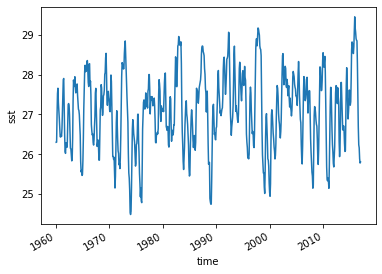

In [74]:
#Select the Nino 3.4 region
#Nino 3.4 (5N-5S,170W-120W)
region34=SST.sel(time=slice('1960','2016')).sel(lat=[4.0,2.0,0.0,-2.0,-4.0]).sel(lon=np.arange(190.0,240.0,2))
region34_mean=np.mean(region34,axis=(1,2))
region34_mean.plot()
plt.show()

In [71]:
# Calculate the climatology 
SST_clim = region34_mean.groupby('time.month').mean()
SST_clim

<xarray.DataArray 'sst' (month: 12)>
array([26.61935 , 26.770906, 27.252583, 27.706362, 27.82663 , 27.643534,
       27.263235, 26.898714, 26.817177, 26.796097, 26.768312, 26.68052 ],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [77]:
# Obtain anomalies
# Group data by month
group_data = region34_mean.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
SST_anom = group_data - group_data.mean(dim='time')
SST_anom

<xarray.DataArray 'sst' (time: 684)>
array([-3.18344116e-01, -4.65917587e-01, -2.63168335e-01, -1.82060242e-01,
       -1.67739868e-01, -3.53347778e-01, -1.42812729e-01,  1.24893188e-02,
       -1.46671295e-01, -3.55810165e-01, -3.36891174e-01, -1.87370300e-01,
       -1.70898438e-01, -1.24221802e-01, -2.35284805e-01, -1.99670792e-01,
        4.98085022e-02,  2.60129929e-01, -3.66573334e-02, -3.90281677e-01,
       -7.46915817e-01, -7.73921967e-01, -4.82503891e-01, -4.14920807e-01,
       -4.46126938e-01, -4.65217590e-01, -4.34543610e-01, -4.57771301e-01,
       -5.53146362e-01, -4.15283203e-01, -2.70326614e-01, -3.13659668e-01,
       -6.66223526e-01, -6.58889771e-01, -8.02062988e-01, -8.47068787e-01,
       -6.99579239e-01, -3.54097366e-01,  7.61318207e-02,  1.59208298e-01,
       -1.01890564e-01,  6.04934692e-02,  6.84280396e-01,  7.98904419e-01,
        7.25475311e-01,  8.38850021e-01,  9.05050278e-01,  1.08613205e+00,
        8.68268967e-01,  5.42488098e-01, -1.21522903e-01, -6.03666306e-01,
       -8.33919525e-01, -9.23204422e-01, -7.87134171e-01, -1.07840919e+00,
       -1.26352501e+00, -1.20001793e+00, -1.30023766e+00, -1.18923378e+00,
       -7.73843765e-01, -3.60757828e-01, -1.14671707e-01, -8.19797516e-02,
        2.62321472e-01,  5.92378616e-01,  8.10657501e-01,  1.24586487e+00,
        1.28054047e+00,  1.53860283e+00,  1.58552933e+00,  1.43691635e+00,
        1.18023491e+00,  9.31186676e-01,  1.01043701e+00,  5.67937851e-01,
       -9.38129425e-02,  1.95114136e-01,  2.31363297e-01, -1.53738022e-01,
...
       -1.44737816e+00, -1.46210861e+00, -1.36792374e+00, -1.35600090e+00,
       -1.47466278e+00, -1.06418610e+00, -8.63176346e-01, -5.04146576e-01,
       -1.45734787e-01,  3.11889648e-02, -1.11433029e-01, -2.90573120e-01,
       -5.73284149e-01, -7.36679077e-01, -9.97539520e-01, -9.99164581e-01,
       -7.07075119e-01, -5.80764771e-01, -3.22902679e-01, -1.69883728e-01,
       -1.02039337e-01,  6.21051788e-02,  1.48912430e-01,  3.74141693e-01,
        8.52010727e-01,  6.49253845e-01,  5.27261734e-01, -3.60015869e-01,
       -6.78792953e-01, -5.42827606e-01, -3.83172989e-01,  9.44747925e-02,
       -2.27737427e-02, -2.16526031e-01, -2.59452820e-01, -2.84778595e-01,
       -2.07406998e-01, -8.19282532e-02, -1.59025192e-01, -4.04891968e-01,
       -5.49022675e-01, -6.80887222e-01, -4.00798798e-01,  1.16500854e-02,
        3.47194672e-01,  1.92991257e-01,  7.01618195e-02, -1.30443573e-02,
        2.46276855e-01,  5.00219345e-01,  8.46117020e-01,  7.08015442e-01,
        6.14273071e-01,  5.48891068e-01,  6.00421906e-01,  9.04464722e-01,
        9.95594025e-01,  1.13492584e+00,  1.39009285e+00,  1.63150787e+00,
        1.88546944e+00,  2.29891205e+00,  2.68434143e+00,  2.50113487e+00,
        2.44583702e+00,  2.13540077e+00,  1.61340904e+00,  1.14243507e+00,
        4.59938049e-01, -1.26291275e-01, -5.77703476e-01, -6.60339355e-01,
       -6.55809402e-01, -9.10243988e-01, -9.89250183e-01, -8.74914169e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

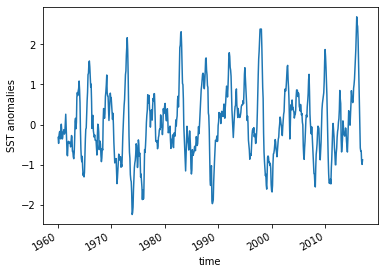

In [76]:
#Plot SST_anom
SST_anom.plot()
plt.ylabel("SST anomalies")
plt.show()

### 1.2 [5 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

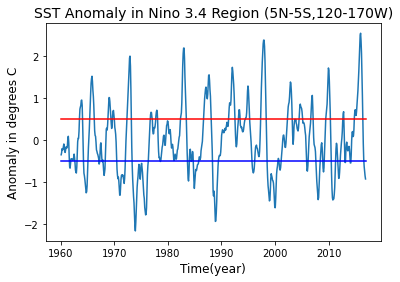

In [79]:
#Set the time
ctime=time.sel(time=slice('1960','2016'))
xtime=ctime.isel(time=np.arange(1,57*12-1)).values
#Calculate Nino 3.4 index
nstep=int(57*12-2)
Nino34_index=np.zeros(nstep)
Nino34_ul=np.zeros(nstep)
Nino34_dl=np.zeros(nstep)
for i in range(0,nstep):
    Nino34_index[i]=np.mean(SST_anom[i:i+3])
    Nino34_ul[i]=0.5
    Nino34_dl[i]=-0.5

plt.title('SST Anomaly in Nino 3.4 Region (5N-5S,120-170W)',fontsize=14)
plt.xlabel('Time(year)',fontsize=12)
plt.ylabel('Anomaly in degrees C',fontsize=12)
plt.plot(xtime,Nino34_index)
plt.plot(xtime,Nino34_ul,'r')
plt.plot(xtime,Nino34_dl,'b')
plt.show()